In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
df_hospdischarge=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')

In [6]:
df_Cardiaccomplications=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='CardiacComplications')

In [7]:
df_responsiveness=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Responsivenes')

In [8]:
df_patienthistory=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='PatientHistory')

In [9]:
df_Labs=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')

In [10]:
df_Demography=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')

In [11]:
df_Patientpriscriptions=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Patient_Precriptions')

### Q 50 Display the lab details of the patient with maximum pulse using the .loc

In [198]:
max_pulse_index = df_Labs['pulse'].idxmax()
patient_max_pulse = df_Labs.loc[max_pulse_index]
print("Lab reports of patient with max pulse:\n",patient_max_pulse) 


Lab reports of patient with max pulse:
 inpatient_number           756996.00
body_temperature               36.00
pulse                         198.00
respiration                    19.00
systolic_blood_pressure       105.00
                             ...    
partial_oxygen_pressure       125.00
oxyhemoglobin                  97.60
anion_gap                      12.50
free_calcium                    1.07
total_hemoglobin              132.00
Name: 457, Length: 107, dtype: float64


### Q 51 Display a violin chart to show distribution of Pulse Rate against age.

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250')])

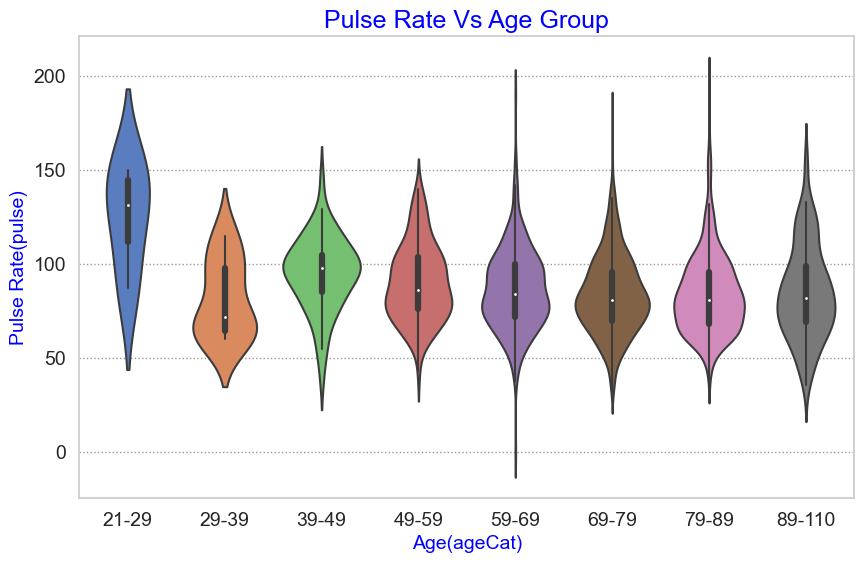

In [194]:
sns.set_style("whitegrid" ,{"grid.color": ".6", "grid.linestyle": ":"}) # define style
plt.figure(figsize=(10, 6)) # define size
sns.violinplot(x=df_Demography.sort_values(by='ageCat')['ageCat'], y=df_Labs['pulse'], palette="muted")# draw plot
plt.title('Pulse Rate Vs Age Group', fontsize=18, color ='blue')
plt.xlabel('Age(ageCat)', fontsize=14, color='blue')
plt.ylabel('Pulse Rate(pulse)', fontsize=14, color='blue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Q 52 Create a Point Plot on Age against time to readmission.

C:\Users\ajays\anaconda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning:

Mean of empty slice



(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400'),
  Text(0, 450.0, '450')])

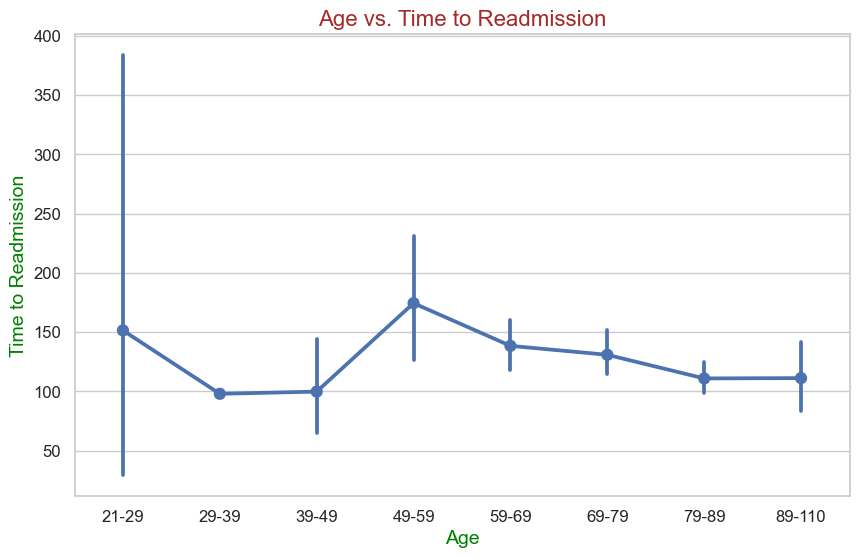

In [238]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
combined_df = pd.merge(df_Demography, df_hospdischarge, on='inpatient_number')
combined_df_sorted = combined_df.sort_values(by='ageCat')
sns.pointplot(x='ageCat', y= "readmission_time_days_from_admission", data=combined_df_sorted)
plt.title('Age vs. Time to Readmission', fontsize=16, color='Brown')
plt.xlabel('Age', fontsize=14, color='green')
plt.ylabel('Time to Readmission', fontsize=14, color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


### Q 53 What is the correlation between CCI score and outcome?

In [232]:
df_hospdischarge['outcome_during_hospitalization'].unique()
outcome_mapping = {'Alive': 1, 'Dead': 2, 'DischargeAgainstOrder': 3}
df_hospdischarge['outcome'] = df_hospdischarge['outcome_during_hospitalization'].map(outcome_mapping)
cf = df_patienthistory['CCI_score'].corr(df_hospdischarge['outcome'])
print("The correlation between CCI score and outcome: ", round(cf,3))

The correlation between CCI score and outcome:  0.094


### Q 54 For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [2]:
given_array =[0,1,2,6,8]
for i in given_array:
    if i>0 and i%2==0:
    print(i*i)

IndentationError: expected an indented block after 'if' statement on line 3 (1206849586.py, line 4)

### Q 55 Create a jointplot on diastolic_blood_pressure & length of stay

C:\Users\ajays\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajays\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


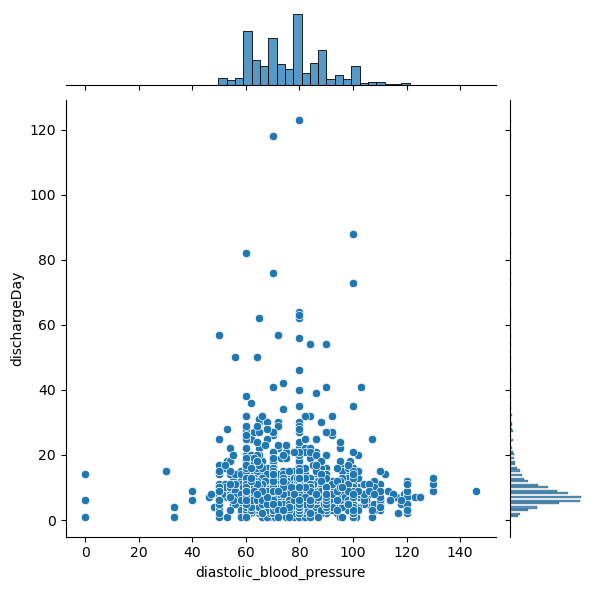

In [116]:
df_hospdischarge=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
df_Labs=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')

combined= pd.merge(df_hospdischarge,df_Labs,on='inpatient_number',how='left')
#combined
sns.jointplot(x = "diastolic_blood_pressure", y = "dischargeDay", 
              kind = "scatter", data = combined) 


### Q 56 Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [126]:
display(df_Demography.iloc[101:202 , [2,6]])

,weight,ageCat
101,41.0,69-79
102,64.0,79-89
103,61.0,79-89
104,40.0,79-89
105,73.0,69-79
...,...,...
197,50.0,79-89
198,50.0,89-110
199,50.0,69-79
200,63.0,59-69


 ### Q 57 Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of           patients in each category as values 


In [138]:
pivot = df_hospdischarge.pivot_table(index=['outcome_during_hospitalization'], columns=['admission_ward'],values=['inpatient_number'], aggfunc='count')
pivot

inpatient_number                       
admission_ward                       Cardiology GeneralWard ICU Others
outcome_during_hospitalization                                        
Alive                                      1472         238  12    168
Dead                                          8           1   1      1
DischargeAgainstOrder                        67          26   2     12